In [197]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [198]:
#stock_ticker = yf.Ticker("msft")
# stock_ticker = yf.Ticker("RELIANCE.NS")
stock_ticker = yf.Ticker("AAPL")

In [199]:
stock_data = stock_ticker.history(period="max")

stock_data = stock_data.loc['2010-01-01':]

# stock_data['Avg_low_high'] = (stock_data['Low'] + stock_data['High'])/2
stock_data['Avg_open_close'] = ( stock_data['Open'] + stock_data['Close'] )/2

del stock_data['Dividends']
del stock_data['Stock Splits']
del stock_data['Volume']
del stock_data['Open']
del stock_data['High']
del stock_data['Low']
del stock_data['Close']

In [200]:
stock_data

,Avg_open_close
Date,
2010-01-04 00:00:00-05:00,6.487491
2010-01-05 00:00:00-05:00,6.510867
2010-01-06 00:00:00-05:00,6.455770
2010-01-07 00:00:00-05:00,6.409934
2010-01-08 00:00:00-05:00,6.409174
...,...
2023-05-22 00:00:00-04:00,174.089996
2023-05-23 00:00:00-04:00,172.345001
2023-05-24 00:00:00-04:00,171.464996


In [201]:
stock_data_dataframe = stock_data # Data frame 
stock_data_csv = stock_data.to_csv(index = True) # CSV file

In [202]:
# stock_data_dataframe

In [203]:
# print(type(stock_data_dataframe))
# print(type(stock_data_csv)) #CSV format

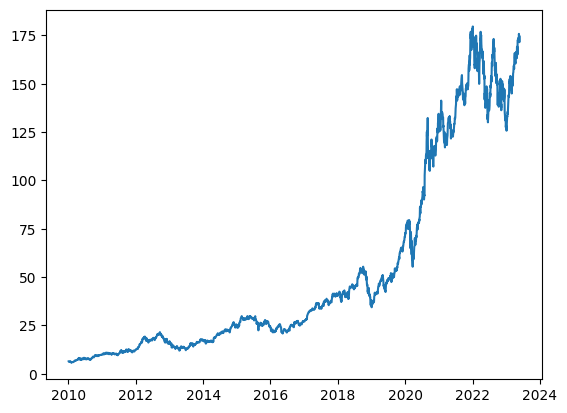

In [204]:
import matplotlib.pyplot as plt
plt.plot(stock_data_dataframe)
# plt.plot(stock_data_csv)

In [205]:
# stock_data_csv
final_stock_data=stock_data_dataframe.reset_index()['Avg_open_close']

In [206]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
final_stock_data = scaler.fit_transform(np.array(final_stock_data).reshape(-1,1))

In [207]:
print(final_stock_data)
type(final_stock_data) #df1 = final_stock_data

[[0.00352439]
 [0.00365895]
 [0.0033418 ]
 ...
 [0.95319165]
 [0.96030078]
 [0.96994263]]


numpy.ndarray

In [208]:
# final_stock_data_2 = final_stock_data.values
# final_stock_data_2

In [209]:
##splitting dataset into train and test split
training_size=int(len(final_stock_data)*0.65)
test_size=len(final_stock_data)-training_size
train_data,test_data=final_stock_data[0:training_size,:],final_stock_data[training_size:len(final_stock_data),:1]

In [210]:
training_size,test_size

(2192, 1181)

In [211]:
train_data

array([[0.00352439],
       [0.00365895],
       [0.0033418 ],
       ...,
       [0.27665935],
       [0.27642475],
       [0.26982772]])

In [212]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [213]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [214]:
print(X_train.shape), print(y_train.shape)

(2181, 10)
(2181,)


(None, None)

In [215]:
print(X_test.shape), print(ytest.shape)

(1170, 10)
(1170,)


(None, None)

In [216]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [217]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM

In [218]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [219]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 10, 50)            10400     
                                                                 
 lstm_16 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [220]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
35/35 [==============================] - 10s 40ms/step - loss: 0.0027 - val_loss: 0.0125
Epoch 2/100
35/35 [==============================] - 0s 10ms/step - loss: 7.2547e-05 - val_loss: 0.0024
Epoch 3/100
35/35 [==============================] - 0s 12ms/step - loss: 2.4119e-05 - val_loss: 8.6004e-04
Epoch 4/100
35/35 [==============================] - 0s 10ms/step - loss: 2.4601e-05 - val_loss: 9.3730e-04
Epoch 5/100
35/35 [==============================] - 0s 10ms/step - loss: 2.3326e-05 - val_loss: 7.7647e-04
Epoch 6/100
35/35 [==============================] - 0s 10ms/step - loss: 2.4883e-05 - val_loss: 7.8257e-04
Epoch 7/100
35/35 [==============================] - 0s 11ms/step - loss: 2.3483e-05 - val_loss: 8.0555e-04
Epoch 8/100
35/35 [==============================] - 0s 10ms/step - loss: 2.3096e-05 - val_loss: 8.1586e-04
Epoch 9/100
35/35 [==============================] - 0s 13ms/step - loss: 2.2841e-05 - val_loss: 9.4660e-04
Epoch 10/100
35/35 [===================

In [221]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

37/37 [==============================] - 0s 3ms/step


In [222]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [223]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

24.03699432462226

In [224]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

117.44193903558373

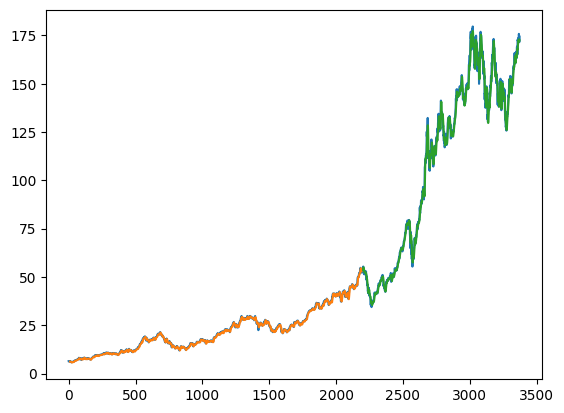

In [225]:
### Plotting 
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = numpy.empty_like(final_stock_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(final_stock_data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(final_stock_data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(final_stock_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [226]:
test_data_length = len(test_data)
test_data_length - time_step

1171

In [227]:
x_input=test_data[(test_data_length - time_step):].reshape(1,-1)
x_input.shape


(1, 10)

In [228]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [229]:
#temp_input

In [238]:
days = 10

In [239]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=time_step
i=0
while(i<days):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
                  #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
                 #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
                  #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
                  #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.9456540942192078], [0.9431172013282776], [0.9403402805328369], [0.9375099539756775], [0.9349731802940369], [0.9327569603919983], [0.930152177810669], [0.927641749382019], [0.9251794219017029], [0.9227451682090759]]


In [240]:
scaler.inverse_transform(lst_output)

array([[170.15556242],
       [169.71484989],
       [169.23243938],
       [168.74075114],
       [168.30005932],
       [167.91505454],
       [167.46254811],
       [167.02643302],
       [166.5986741 ],
       [166.17579219]])

In [241]:
length_final_stock_data = len(final_stock_data)
length_final_stock_data

3373

In [242]:
# day_new=np.arange(0,length_final_stock_data)
# day_pred=np.arange(length_final_stock_data,length_final_stock_data + days)

day_new=np.arange(0,time_step)
day_pred=np.arange(time_step,time_step + days)

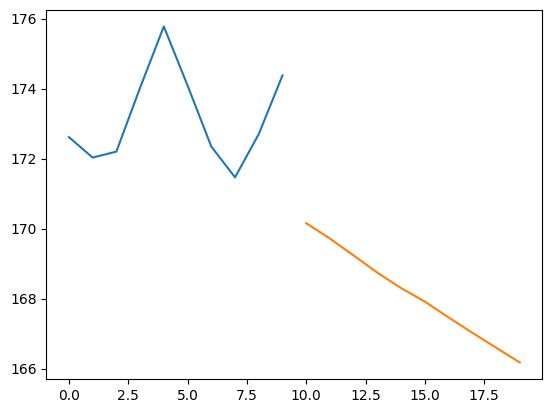

In [243]:
plt.plot(day_new , scaler.inverse_transform(final_stock_data[length_final_stock_data-time_step:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output[:]))

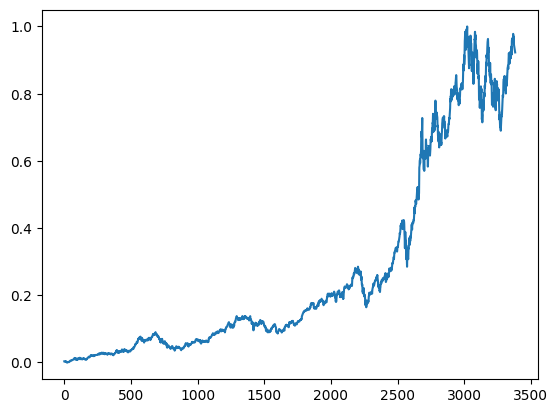

In [244]:
df3=final_stock_data.tolist()
df3.extend(lst_output)
plt.plot(df3[:])

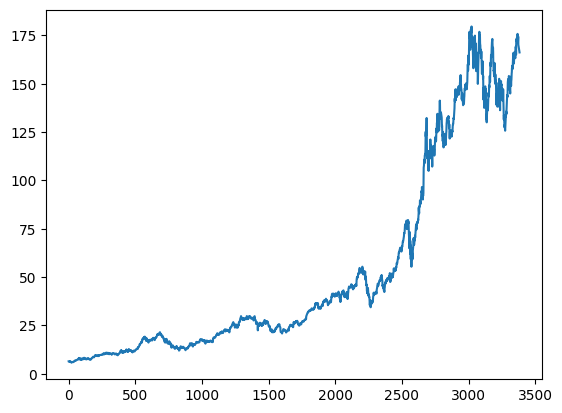

In [245]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

Output is  lst_output